In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
! pip install -U scikit-learn
from sklearn.preprocessing import StandardScaler
! pip install -U statsmodels
from statsmodels.multivariate.manova import MANOVA
import scipy.stats as stats


In [2]:
df = pd.read_csv('Customer Purchasing Behaviors.csv')

Correlation Matrix for Region: North-East


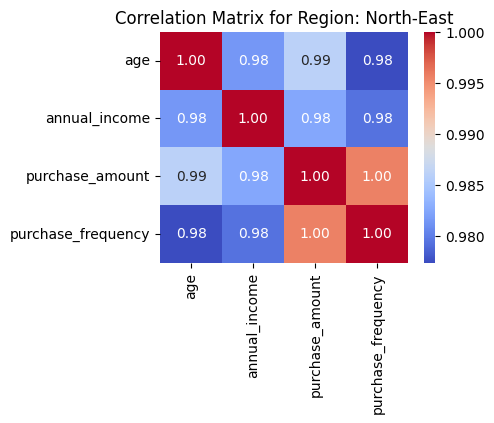

Correlation Matrix for Region: South-West


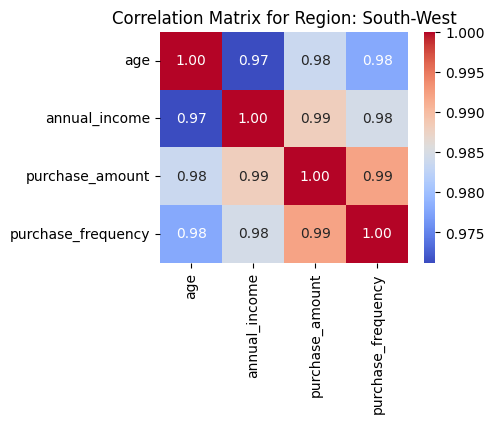

In [3]:
# group the data by nort east and south west
df=df.drop(columns=['user_id','loyalty_score'])
grouped = df.groupby('region')
# combine north with east and south with west
grouped = df.groupby(df['region'].map(lambda x: 'North-East' if x in ['North', 'East'] else 'South-West'))
for region, group_data in grouped:
    print(f"Correlation Matrix for Region: {region}")
    
    # Select only numeric columns
    numeric_data = group_data.select_dtypes(include='number')
    
    # Calculate the correlation matrix
    correlation_matrix = numeric_data.corr()
    
    # Step 3: Plot the correlation matrix as a heatmap
    # print the correlation matrix side by side
    plt.figure(figsize=(4, 3))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for Region: {region}")
    plt.show()

In [4]:
df = pd.read_csv('Customer Purchasing Behaviors.csv')

# grouped = df.drop(columns=['user_id','loyalty_score']).groupby('region')
# # combine north with east and south with west
grouped = df.drop(columns=['user_id','loyalty_score']).groupby(df['region'].map(lambda x: 'North-East' if x in ['North', 'East'] else 'South-West'))

In [5]:
print(grouped.groups)
# print columns for each group
for region, group_data in grouped:
    print(f"Columns for Region: {region}")
    print(group_data.columns)
    print()

# drop region from each group
for region, group_data in grouped:
    group_data = group_data.drop(columns=['region'])
    # save the group data back to the original dataframe
    # df.loc[group_data.index] = group_data
    print(f"Columns for Region: {region}")
    print(group_data.columns)
    print()

{'North-East': [0, 3, 4, 7, 8, 11, 13, 15, 18, 19, 22, 24, 26, 29, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237], 'South-West': [1, 2, 5, 6, 9, 10, 12, 14, 16, 17, 20, 21, 23, 25, 27, 28, 31, 32, 34, 35, 37, 38, 40, 41, 43, 44, 46, 47, 49, 50, 52, 53, 55, 56, 58, 59, 61, 62, 64, 65, 67, 68, 70, 71, 73, 74, 76, 77, 79, 80, 82, 83, 85, 86, 88, 89, 91, 92, 94, 95, 97, 98, 100, 101, 103, 104, 106, 107, 109, 110, 112, 113, 115, 116, 118, 119, 121, 122, 124, 125, 127, 128, 130, 131, 133, 134, 136, 137, 139, 140, 142, 143, 145, 146, 148, 149, 151, 152, 154, 155, ...]}
Columns for Region: North-East
Index(['age', 'annual_income', 'purchase_amount', 'region',
       'purchase_frequency'],
      dtype='object')

Columns 

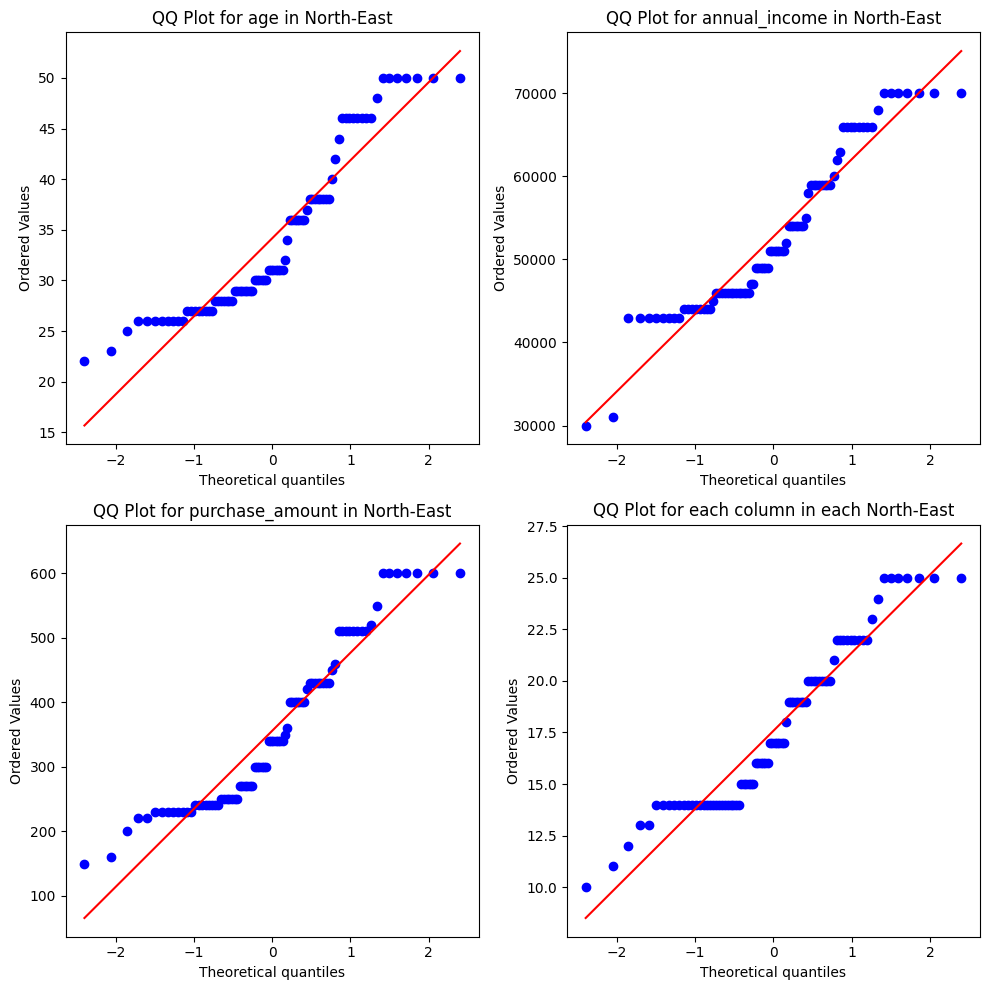

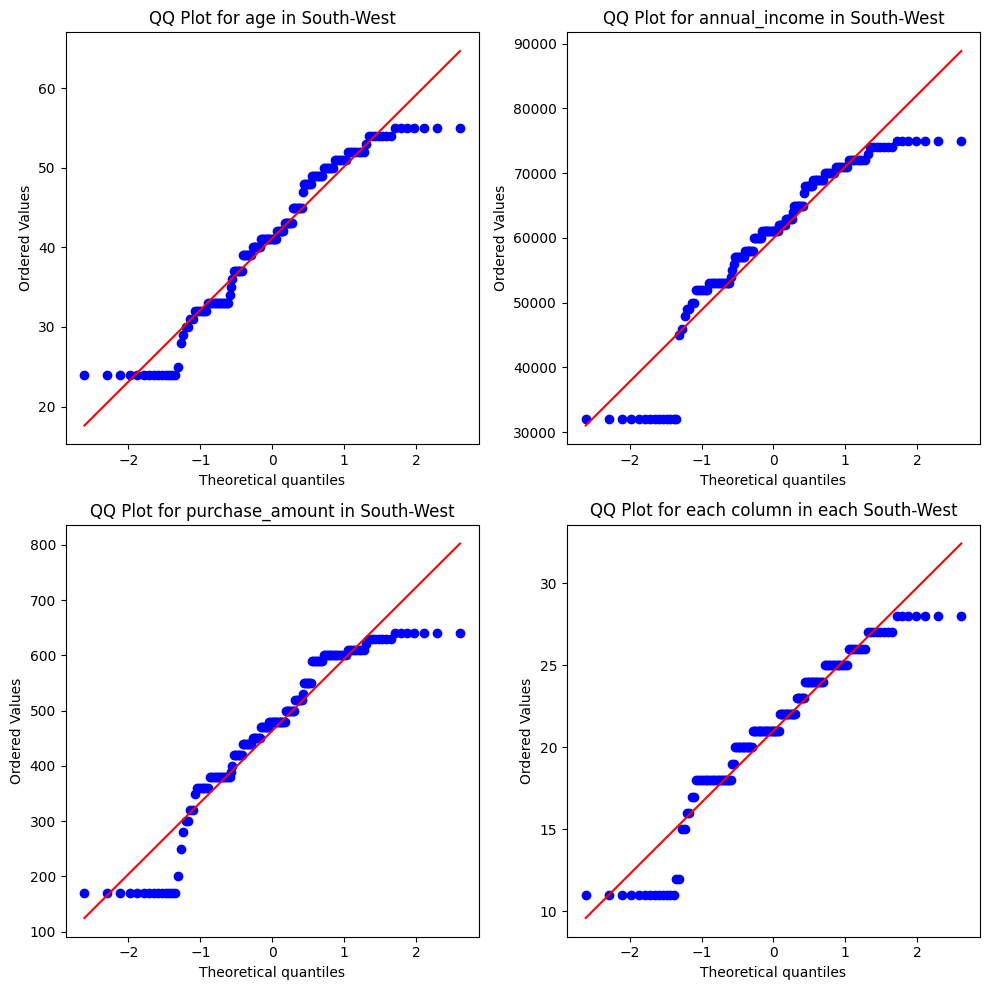

In [6]:


# plot the QQ plot for grouped data , 2 groups , 4 plots for each group, 
for i, (region, group_data) in enumerate(grouped):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    group_data = group_data.drop(columns=['region'])
    for j, column in enumerate(group_data.columns):
        ax = axs[j//2, j%2]
        stats.probplot(group_data[column], plot=ax)
        ax.set_title(f"QQ Plot for {column} in {region}")
        # print (i+j//2, j%2)
    plt.tight_layout()
    plt.title(f"QQ Plot for each column in each {region}")
    plt.show()



Correlation Matrix for Region: North-East


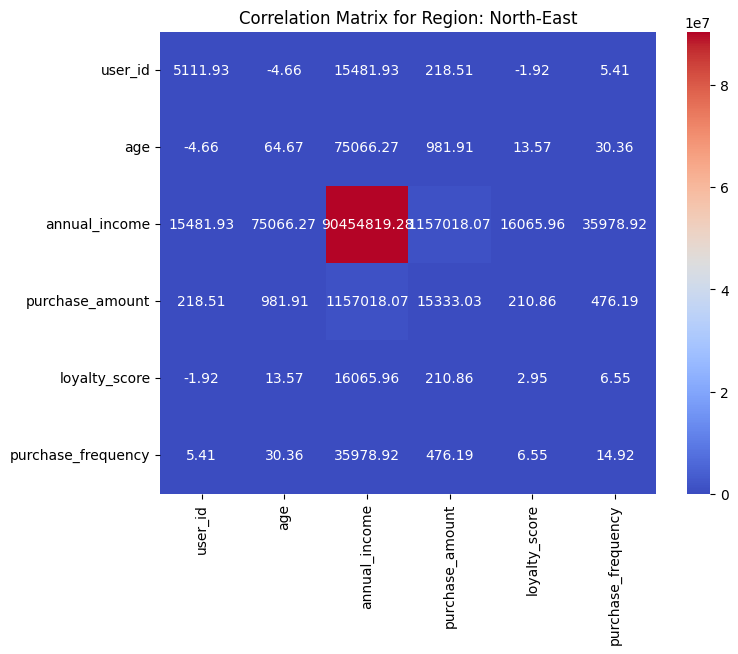

Correlation Matrix for Region: South-West


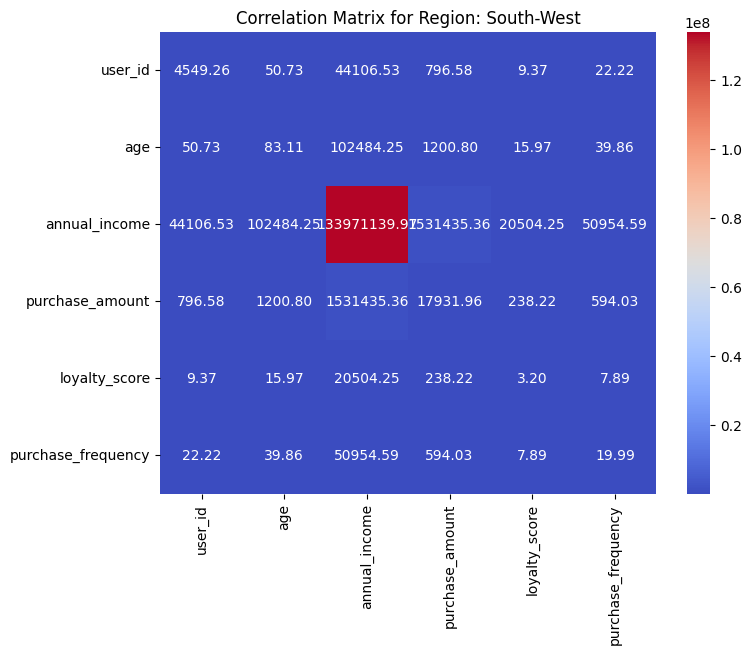

In [10]:
df = pd.read_csv('Customer Purchasing Behaviors.csv')

# grouped = df.groupby('region')
# # combine north with east and south with west
grouped = df.groupby(df['region'].map(lambda x: 'North-East' if x in ['North', 'East'] else 'South-West'))
# plot coorelation matrix for each group
for region, group_data in grouped:
    print(f"Correlation Matrix for Region: {region}")
    
    # Select only numeric columns
    numeric_data = group_data.select_dtypes(include='number')
    
    # Calculate the correlation matrix
    correlation_matrix = numeric_data.cov()
    
    # Step 3: Plot the correlation matrix as a heatmap
    # print the correlation matrix side by side
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for Region: {region}")
    plt.show()

In [8]:
import numpy as np

def wilks_lambda(corr_matrix_1, corr_matrix_2, n1, n2):
    """
    Compute Wilks' Lambda to compare two correlation matrices.
    
    Parameters:
    corr_matrix_1 : numpy array (correlation matrix of group 1)
    corr_matrix_2 : numpy array (correlation matrix of group 2)
    n1 : int (sample size of group 1)
    n2 : int (sample size of group 2)
    
    Returns:
    Wilks' Lambda statistic
    """
    # Calculate determinants of individual group correlation matrices
    det_S1 = np.linalg.det(corr_matrix_1)
    det_S2 = np.linalg.det(corr_matrix_2)
    
    # Calculate the pooled covariance matrix (assuming equal variance)
    pooled_matrix = ((n1 - 1) * corr_matrix_1 + (n2 - 1) * corr_matrix_2) / (n1 + n2 - 2)
    
    # Determinant of the pooled matrix
    det_S_pooled = np.linalg.det(pooled_matrix)
    
    # Compute Wilks' Lambda using the given formula
    lambda_stat = (det_S1 / det_S_pooled)**((n1 - 1) / 2) * (det_S2 / det_S_pooled)**((n2 - 1) / 2)
    
    return lambda_stat

list_of_corr_matrices = []
for region, group_data in grouped:
    # print(f"Correlation Matrix for Region: {region}")
    
    # Select only numeric columns
    numeric_data = group_data.select_dtypes(include='number')
    
    # Calculate the correlation matrix
    correlation_matrix = numeric_data.corr()
    list_of_corr_matrices.append(correlation_matrix)

# Calculate Wilks' Lambda
n1 = len(grouped.get_group('North-East'))
n2 = len(grouped.get_group('South-West'))
wilks_lambda_stat = wilks_lambda(list_of_corr_matrices[0], list_of_corr_matrices[1], n1, n2)
print(f"Wilks' Lambda statistic: {wilks_lambda_stat}")

# Calculate the degrees of freedom
p = len(numeric_data.columns)
df1 = p
df2 = n1 + n2 - p - 1
print(f"Degrees of freedom: {df1}, {df2}")

# Calculate the p-value
F_stat = ((1 - wilks_lambda_stat) / wilks_lambda_stat) * (df2 / df1)
p_value = 1 - stats.f.cdf(F_stat, df1, df2)

print(f"p-value: {p_value}")

# accept or reject the null hypothesis
print(f"Reject the null hypothesis: {p_value < 0.05}")




Wilks' Lambda statistic: 2.218406922117393e-12
Degrees of freedom: 6, 231
p-value: 1.1102230246251565e-16
Reject the null hypothesis: True


In [9]:
# calculate hotelling t2 for two groups

def hotelling_t2(corr_matrix_1, corr_matrix_2, n1, n2, mean1 , mean2):
    """
    Compute Hotelling's T-squared statistic to compare two correlation matrices.
    
    Parameters:
    corr_matrix_1 : numpy array (correlation matrix of group 1)
    corr_matrix_2 : numpy array (correlation matrix of group 2)
    n1 : int (sample size of group 1)
    n2 : int (sample size of group 2)
    """

    # Calculate the pooled covariance matrix (assuming equal variance)
    pooled_matrix = ((n1 - 1) * corr_matrix_1 + (n2 - 1) * corr_matrix_2) / (n1 + n2 - 2)

    # Calculate the inverse of the pooled covariance matrix
    inv_pooled_matrix = np.linalg.inv(pooled_matrix)

    # Calculate the difference between the means of the two groups
    mean_diff = mean1 - mean2

    # Calculate the Hotelling's T-squared statistic
    T2 = n1 * n2 / (n1 + n2) * np.dot(np.dot(mean_diff, inv_pooled_matrix), mean_diff)

    print(f"Hotelling's T-squared statistic: {T2}")

    # Calculate F statistic

    p = len(numeric_data.columns)

    df1 = p
    df2 = n1 + n2 - p - 1

    F_stat = (n1 + n2 - p - 1) / (p * (n1 + n2 - 2)) * T2
    print(f"F statistic: {F_stat}")

    # Calculate the p-value


    p_value = 1 - stats.f.cdf(F_stat, df1, df2)

    print(f"p-value: {p_value}")

    # accept or reject the null hypothesis
    print(f"Reject the null hypothesis: {p_value < 0.05}")

# pass the correlation matrices and sample sizes to the function
print(list_of_corr_matrices[0])
print(type(list_of_corr_matrices[0]))
# convert the correlation matrices to numpy arrays and remove the string columns
# list_of_corr_matrices[0] = list_of_corr_matrices[0].to_numpy()
# list_of_corr_matrices[1] = list_of_corr_matrices[1].to_numpy()
print(type(list_of_corr_matrices[0]))
mean1 = grouped.get_group('North-East').select_dtypes(include='number').mean()
mean2 = grouped.get_group('South-West').select_dtypes(include='number').mean()
hotelling_t2(list_of_corr_matrices[0], list_of_corr_matrices[1], n1, n2, mean1, mean2)

                     user_id       age  annual_income  purchase_amount  \
user_id             1.000000 -0.008102       0.022768         0.024682   
age                -0.008102  1.000000       0.981466         0.986059   
annual_income       0.022768  0.981466       1.000000         0.982450   
purchase_amount     0.024682  0.986059       0.982450         1.000000   
loyalty_score      -0.015629  0.983051       0.984331         0.992263   
purchase_frequency  0.019573  0.977340       0.979350         0.995580   

                    loyalty_score  purchase_frequency  
user_id                 -0.015629            0.019573  
age                      0.983051            0.977340  
annual_income            0.984331            0.979350  
purchase_amount          0.992263            0.995580  
loyalty_score            1.000000            0.988046  
purchase_frequency       0.988046            1.000000  
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Hotelling's T